In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [166]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

In [167]:

# file_path = '/content/drive/My Drive/sem5 project/SLYieldData.csv'
# df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
# df2 = pd.read_csv('/content/drive/MyDrive//sem5 project/Sri Lanka 3-Month Bond Yield Historical Data .csv',index_col="Date",parse_dates=True)

In [168]:
#df = pd.read_csv('/content/drive/MyDrive/5th sem project/SLYieldData.csv', index_col='Date', parse_dates=True)
# df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5th sem project/2009-2018 - 3-Month Bond Yield Historical Data (2).csv',index_col="Date",parse_dates=True)

df4

In [169]:
df2 = pd.read_csv(r'..\Data\3-Month 2009-2019.csv', index_col="Date", parse_dates=True)


In [170]:
df2.tail()

,Price,Open,High,Low,Change %
Date,,,,,
2009-04-26,12.942,12.942,12.942,12.942,-4.35%
2009-04-19,13.530,13.530,13.530,13.530,-5.71%
2009-04-12,14.350,14.350,14.350,14.350,-0.54%
2009-04-05,14.428,14.428,14.428,14.428,-0.37%
2009-03-29,14.481,14.481,14.481,14.481,19.43%


In [171]:
df2.reset_index(inplace=True)
df2['Date'] = df2['Date'].astype(str)

valid_date_pattern = r'^\d{4}-\d{2}-\d{2}'
df2 = df2[df2['Date'].str.match(valid_date_pattern)]
df2.reset_index(drop=True, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      483 non-null    object 
 1   Price     483 non-null    float64
 2   Open      483 non-null    float64
 3   High      483 non-null    float64
 4   Low       483 non-null    float64
 5   Change %  483 non-null    object 
dtypes: float64(4), object(2)
memory usage: 22.8+ KB


In [172]:
df2.head(10)

,Date,Price,Open,High,Low,Change %
0,2018-06-24,8.300,8.400,8.500,8.300,-1.19%
1,2018-06-17,8.400,8.300,8.550,8.300,0.00%
2,2018-06-10,8.400,8.350,8.500,8.300,0.60%
3,2018-06-03,8.350,8.267,8.400,8.267,1.00%
4,2018-05-27,8.267,8.267,8.267,8.267,0.00%
5,2018-05-20,8.267,8.267,8.267,8.267,0.00%
6,2018-05-13,8.267,8.233,8.267,8.233,0.41%
7,2018-05-06,8.233,8.250,8.250,8.233,0.40%
8,2018-04-29,8.200,8.163,8.200,8.163,0.40%
9,2018-04-22,8.167,8.188,8.200,8.167,-1.40%


In [173]:
# df2=df2[['Price']]
# df = df[['X3M']]
df2.tail()

,Date,Price,Open,High,Low,Change %
478,2009-04-26,12.942,12.942,12.942,12.942,-4.35%
479,2009-04-19,13.530,13.530,13.530,13.530,-5.71%
480,2009-04-12,14.350,14.350,14.350,14.350,-0.54%
481,2009-04-05,14.428,14.428,14.428,14.428,-0.37%
482,2009-03-29,14.481,14.481,14.481,14.481,19.43%


In [174]:
df2 = df2.iloc[::-1].reset_index(drop=False)
# df2 = df2.sort_values('Date')
# Display the reversed DataFrame
df2.head()

,index,Date,Price,Open,High,Low,Change %
0,482,2009-03-29,14.481,14.481,14.481,14.481,19.43%
1,481,2009-04-05,14.428,14.428,14.428,14.428,-0.37%
2,480,2009-04-12,14.350,14.350,14.350,14.350,-0.54%
3,479,2009-04-19,13.530,13.530,13.530,13.530,-5.71%
4,478,2009-04-26,12.942,12.942,12.942,12.942,-4.35%


In [175]:
df2.index = df2['Date']
df2.drop('Date', axis=1, inplace=True)
df2 = df2[['Price']]
df2.head()

,Price
Date,
2009-03-29,14.481
2009-04-05,14.428
2009-04-12,14.350
2009-04-19,13.530
2009-04-26,12.942


<Axes: xlabel='Date'>

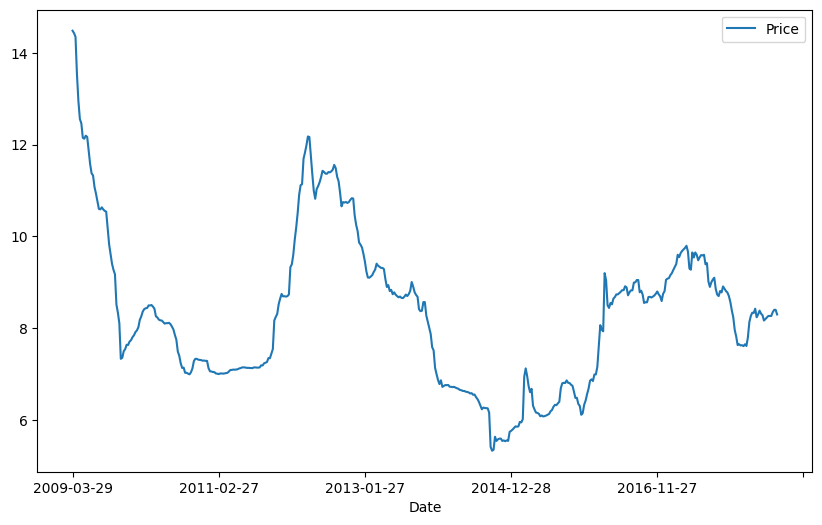

In [176]:
df2.plot(figsize=(10, 6))

In [177]:
# ThreeMonths = df.loc[:,'X3M']
# ThreeMonths.plot(figsize=(10, 6))

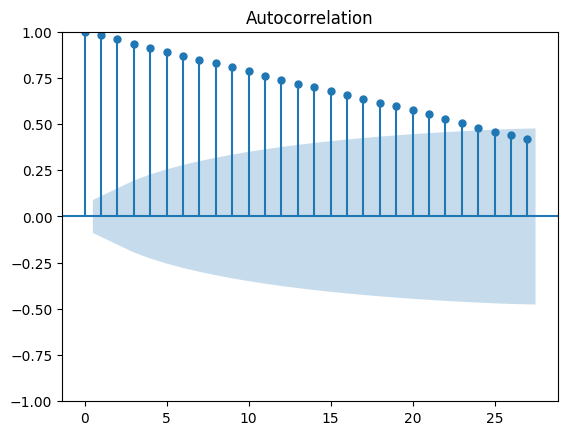

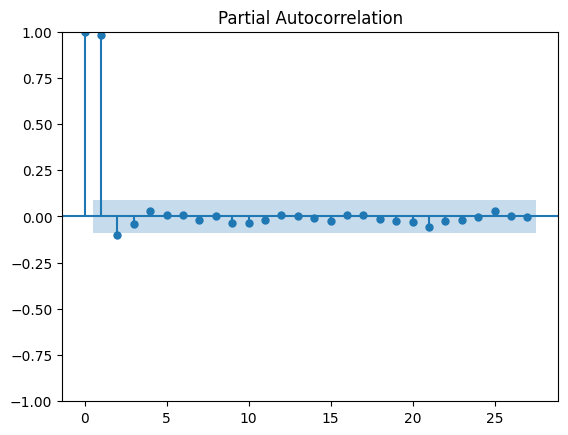

In [178]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df2.index = pd.to_datetime(df2.index)
# df.index = pd.to_datetime(df.index)

# Plot the autocorrelation function
plot_acf(df2['Price'])
plot_pacf(df2['Price'])
plt.show()

In [179]:
# results = seasonal_decompose(df['X3M'],period=3)
# results.plot()

In [180]:
len(df2)
data = df2[['Price']]
# data = df[['X3M']]

print(data)

             Price
Date              
2009-03-29  14.481
2009-04-05  14.428
2009-04-12  14.350
2009-04-19  13.530
2009-04-26  12.942
...            ...
2018-05-27   8.267
2018-06-03   8.350
2018-06-10   8.400
2018-06-17   8.400
2018-06-24   8.300

[483 rows x 1 columns]


In [181]:
train_size = int(len(data)*0.8)  # Have to multiply by 0.8
train = data[:train_size]
test = data[train_size:]

In [182]:
train.tail()

,Price
Date,
2016-07-17,8.783
2016-07-24,8.825
2016-07-31,8.825
2016-08-07,8.994
2016-08-14,9.000


In [183]:
scaler = StandardScaler()                       # MinMaxScaler()

scaler.fit(train)


train_scaled = scaler.transform(train)

test_scaled = scaler.transform(test)


In [184]:
time_step = 23
n_features = 1
# generator = TimeseriesGenerator(train_scaled, train_scaled, length=numberOfInput, batch_size=1)

In [185]:
train_generator = TimeseriesGenerator(train_scaled, train_scaled, length=time_step, batch_size=1)
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=time_step, batch_size=1)

In [186]:
# !pip install keras-tuner
import keras_tuner as kt

In [187]:
# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=50, max_value=200, step=50),
        return_sequences=True,
        input_shape=(time_step, 1)
    ))
    model.add(Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(
        units=hp.Int('units', min_value=50, max_value=200, step=50),
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=1,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Run the tuner
tuner.search(train_generator, epochs=20, validation_data=test_generator)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

Reloading Tuner from my_dir\lstm_tuning\tuner0.json
Epoch 1/20


C:\Users\REDTECH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  7/363 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.1789

C:\Users\REDTECH\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


363/363 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 0.1495 - val_loss: 0.0226
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0606 - val_loss: 0.0164
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0441 - val_loss: 0.0094
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0369 - val_loss: 0.0198
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0397 - val_loss: 0.0110
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0298 - val_loss: 0.0451
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0359 - val_loss: 0.0072
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0254 - val_loss: 0.0067
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0295 - val_loss: 0.0090
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0260 - val_loss: 0.0057
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0354 - val_loss: 0.0062
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1

In [188]:
# loss_per_epoch = model.history.history['loss']
# plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [189]:
train_predictions = model.predict(train_generator)
test_predictions = model.predict(test_generator)

363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [190]:
# test_predictions = []

# arr = np.array([1,2,3])
# filename = '/content/drive/MyDrive/Colab Notebooks/5th sem project'
# np.save(filename,first_eval_batch)
# current_batch = first_eval_batch.reshape((1, numberOfInput, n_features))

# for i in range(len(test_scaled)):
#     current_pred = model.predict(current_batch)[0]
#     test_predictions.append(current_pred)
#     current_batch = np.append(current_batch[:, 1:, :],[[current_pred]], axis=1)
#     print(current_batch)

In [191]:
# first_eval_batch

In [192]:
true_train_predictions = scaler.inverse_transform(train_predictions)
true_test_predictions = scaler.inverse_transform(test_predictions)


In [193]:
# Assuming the date index matches the length of predictions
train_prediction_dates = data.index[time_step:train_size]
test_prediction_dates = data.index[train_size+time_step:]

# train_prediction_dates = data.index[:len(true_train_predictions)]  # Adjust to match true_train_predictions length
# test_prediction_dates = data.index[len(true_train_predictions):]

# Create DataFrame for predictions
train_predictions_df = pd.DataFrame(data=true_train_predictions, index=train_prediction_dates, columns=['Train Predictions'])
test_predictions_df = pd.DataFrame(data=true_test_predictions, index=test_prediction_dates, columns=['Test Predictions'])

# Merge the original DataFrame with the predictions DataFrame
combined_df = df2.join(train_predictions_df, how='left')
combined_df = combined_df.join(test_predictions_df, how='left')


In [194]:
combined_df.tail(20)

,Price,Train Predictions,Test Predictions
Date,,,
2018-02-11,8.133,NaN,7.823242
2018-02-18,8.267,NaN,8.182856
2018-02-25,8.338,NaN,8.318188
2018-03-04,8.333,NaN,8.410079
2018-03-11,8.425,NaN,8.396979
2018-03-18,8.238,NaN,8.512142
2018-03-25,8.300,NaN,8.271055
2018-04-01,8.383,NaN,8.381596
2018-04-08,8.317,NaN,8.448760


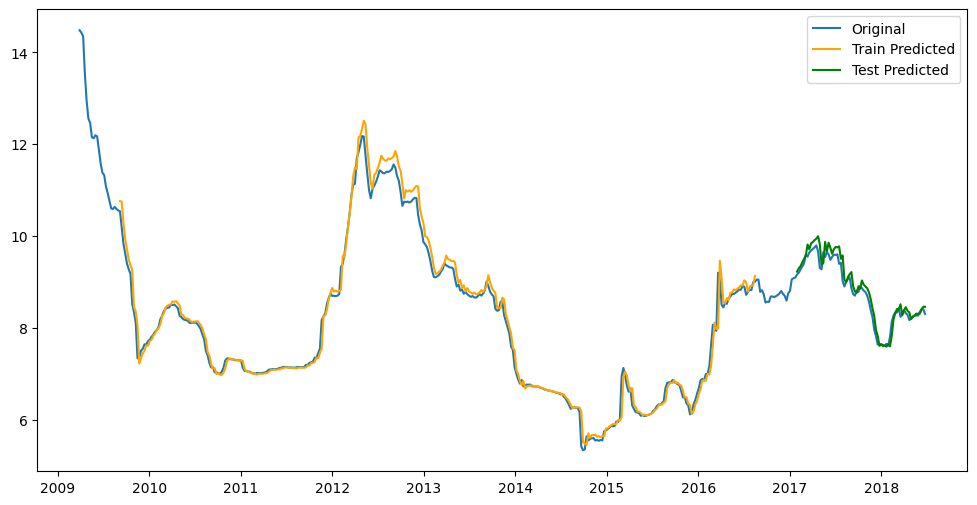

In [195]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Price'], label='Original')
plt.plot(combined_df['Train Predictions'], label='Train Predicted', color='orange')
plt.plot(combined_df['Test Predictions'], label='Test Predicted', color='green')
plt.legend()
plt.show()

In [196]:
# model.save('/content/drive/MyDrive/Colab Notebooks/5th sem project/Models/2009-2022 full train')

In [197]:
# from keras.models import load_model

# model1 =  load_model('/content/drive/MyDrive/Colab Notebooks/5th sem project/Models')

In [198]:
df3 = pd.read_csv('..\\Data\\3-Month 2017-2024.csv', index_col="Date", parse_dates=True)


In [199]:
df3

,Price,Open,High,Low,Change %
Date,,,,,
2024-07-07,10.300,10.300,10.300,10.300,0.00%
2024-06-30,10.300,10.050,10.300,9.900,2.49%
2024-06-23,10.050,10.000,10.250,10.000,8.06%
2024-06-16,9.300,9.100,9.300,9.000,2.20%
2024-06-09,9.100,8.800,9.200,8.750,3.41%
...,...,...,...,...,...
2017-02-12,9.271,9.271,9.271,9.271,0.77%
2017-02-05,9.200,9.200,9.200,9.200,0.46%
2017-01-29,9.158,9.158,9.158,9.158,0.73%


In [200]:
df3 = df3[['Price']]
df3 =df3.iloc[::-1].reset_index(drop=False)
df3.index = df3['Date']
df3.drop('Date', axis=1,inplace=True)


In [201]:
first_eval_batch = test_scaled[-time_step:]

In [202]:
from datetime import datetime

def weeks_between_dates(fixed_date, given_date):
    # Ensure dates are in datetime format
    if isinstance(fixed_date, str):
        fixed_date = datetime.strptime(fixed_date, "%Y-%m-%d")
    if isinstance(given_date, str):
        given_date = datetime.strptime(given_date, "%Y-%m-%d")

    # Calculate the difference in days
    delta_days = (given_date - fixed_date).days

    # Convert days to weeks
    weeks = delta_days // 7
    weeks += 1 if delta_days % 7 > 0 else 0

    return weeks

# Example usage:
fixed_date =  '2018-06-24'      #"2015-06-14"

In [203]:
df3.tail(100)

,Price
Date,
2022-07-17,30.00
2022-07-31,30.00
2022-08-07,29.00
2022-08-14,27.50
2022-08-21,29.25
...,...
2024-06-09,9.10
2024-06-16,9.30
2024-06-23,10.05


In [204]:

def getPredictions(model,date,curr_set):
  predictions= []
  weeks = weeks_between_dates(fixed_date,date)
  initial_set = np.array(curr_set).reshape(1, -1)
  for week in range(weeks):
    curr_set = np.array(initial_set).reshape(1, -1)
    current_pred = model.predict(curr_set, verbose=0)
    predictions.append(current_pred)
    initial_set = np.append(initial_set[:, 1:],current_pred, axis=1)
    print(scaler.inverse_transform(initial_set))
    # print(predictions)
  return predictions


In [205]:
scaler.inverse_transform(first_eval_batch).flatten()

array([7.65 , 7.613, 7.8  , 8.133, 8.267, 8.338, 8.333, 8.425, 8.238,
       8.3  , 8.383, 8.317, 8.283, 8.167, 8.2  , 8.233, 8.267, 8.267,
       8.267, 8.35 , 8.4  , 8.4  , 8.3  ])

In [206]:
Future_date = '2019-09-08'
result = getPredictions(model,Future_date,first_eval_batch)

[[7.613      7.8        8.133      8.267      8.338      8.333
  8.425      8.238      8.3        8.383      8.317      8.283
  8.167      8.2        8.233      8.267      8.267      8.267
  8.35       8.4        8.4        8.3        8.34015321]]
[[7.8        8.133      8.267      8.338      8.333      8.425
  8.238      8.3        8.383      8.317      8.283      8.167
  8.2        8.233      8.267      8.267      8.267      8.35
  8.4        8.4        8.3        8.34015321 8.40333234]]
[[8.133      8.267      8.338      8.333      8.425      8.238
  8.3        8.383      8.317      8.283      8.167      8.2
  8.233      8.267      8.267      8.267      8.35       8.4
  8.4        8.3        8.34015321 8.40333234 8.46420178]]
[[8.267      8.338      8.333      8.425      8.238      8.3
  8.383      8.317      8.283      8.167      8.2        8.233
  8.267      8.267      8.267      8.35       8.4        8.4
  8.3        8.34015321 8.40333234 8.46420178 8.53425426]]
[[8.338      8.33

In [207]:
result_reshaped = np.array(result).reshape(-1,1)
real_result = scaler.inverse_transform(result_reshaped)
# print(real_result)

In [208]:
Answer = real_result[-1]
print('Future predicted for ',Future_date,' is ',Answer)
# print('Actual value for ',Future_date,' is ',df3.loc[Future_date])

Future predicted for  2019-09-08  is  [14.144367]


In [209]:
dates = pd.date_range(start=fixed_date, periods=len(real_result), freq= 'W')
curr_df = pd.DataFrame(real_result, index=dates, columns=['Price'])

In [210]:
# curr_df.tail()

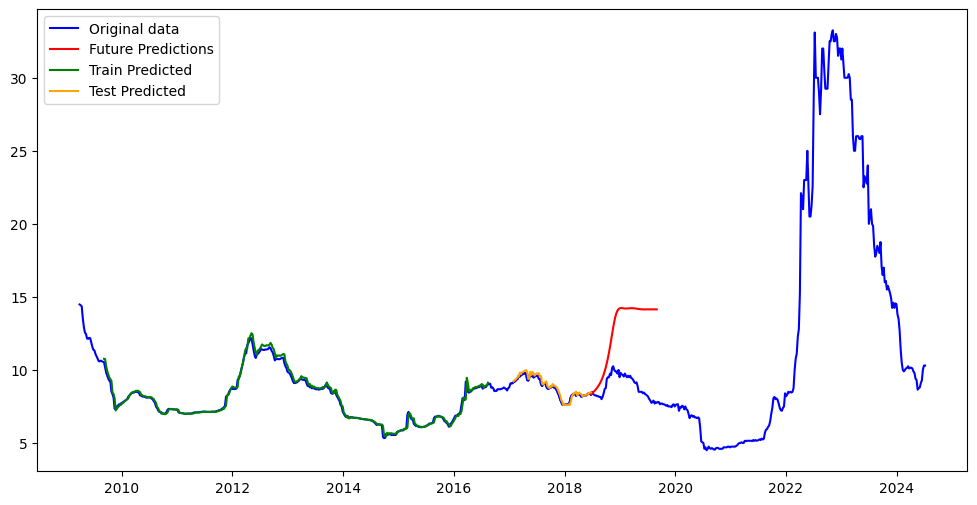

In [211]:
plt.figure(figsize=(12,6))
plt.plot(df3['Price'], color = 'blue' , label = 'Original data')
plt.plot(df2['Price'], color = 'blue')
plt.plot(curr_df['Price'], color = 'red', label = 'Future Predictions')
plt.plot(combined_df['Train Predictions'], color='green', label='Train Predicted')
plt.plot(combined_df['Test Predictions'], color='orange', label='Test Predicted')
plt.legend()
plt.show()